<a href="https://colab.research.google.com/github/aradjabova/dsc-capstone-project-v2-online-ds-ft-120919/blob/master/encoded_simple_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential, Model
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import tensorflow as tf
import torch
from tensorflow import keras
import os, os.path
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, SeparableConv2D, Activation, GaussianNoise, Input, UpSampling2D
from keras import backend as K
from imblearn.over_sampling import SMOTE
from keras.preprocessing import image
from keras import optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.image import load_img




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
path_train = Path('/content/drive/My Drive/Capstone/Kaggle/seg_train/seg_train')
path_test = Path('/content/drive/My Drive/Capstone/Kaggle/seg_test/seg_test')
path_pred = Path('/content/drive/My Drive/Capstone/Kaggle/seg_pred/seg_pred')

In [0]:
categories = ['buildings','forest','glacier','mountain','sea','street']

In [0]:
def encoded_simple_cnn():
  input_shape = (256,256,3)
  # x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
  # x = MaxPooling2D((2, 2), padding='same')(x)
  # x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  # # x = MaxPooling2D((2, 2), padding='same')(x)
  # # x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  # encoded = MaxPooling2D((2, 2), padding='same')(x)

  # x = Flatten()(encoded)
  # x = Dense(128, activation='relu')(x)
  # x = Dropout(0.2)(x)
  # cnn = Dense(6, activation='softmax')

  model = Sequential()
  model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(6,activation='softmax'))


  checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

  model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


  return model

In [0]:
model = encoded_simple_cnn()

In [0]:
# def simple_cnn():
#   input_shape = (256, 256, 3)
#   model = Sequential()
#   model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   # model.add(Conv2D(16, (3,3), activation='relu'))
#   # model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Conv2D(8, (3,3), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))

#   model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#   model.add(Dense(128, activation='relu'))
#   model.add(Dropout(0.2))
#   model.add(Dense(6,activation='softmax'))

#   model.compile(optimizer='adam', 
#                 loss='sparse_categorical_crossentropy', 
#                 metrics=['accuracy'])

#   return model

In [0]:
batch_size = 300

checkpoint = ModelCheckpoint("best_autoencoder.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.3, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)





In [0]:

train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    path_test,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
train = model.fit_generator(
    train_generator,
    epochs=10, 
    validation_data=test_generator,
    callbacks=[checkpoint]
    )

Epoch 1/10
47/47 [==============================] - 262s 6s/step - loss: 1.8805 - accuracy: 0.4025 - val_loss: 0.9971 - val_accuracy: 0.6060

Epoch 00001: loss improved from inf to 1.88170, saving model to best_autoencoder.hdf5
Epoch 2/10
47/47 [==============================] - 267s 6s/step - loss: 0.9308 - accuracy: 0.6461 - val_loss: 1.0347 - val_accuracy: 0.6463

Epoch 00002: loss improved from 1.88170 to 0.93004, saving model to best_autoencoder.hdf5
Epoch 3/10
47/47 [==============================] - 281s 6s/step - loss: 0.7690 - accuracy: 0.7147 - val_loss: 0.6923 - val_accuracy: 0.7340

Epoch 00003: loss improved from 0.93004 to 0.76925, saving model to best_autoencoder.hdf5
Epoch 4/10
47/47 [==============================] - 279s 6s/step - loss: 0.6484 - accuracy: 0.7663 - val_loss: 0.6875 - val_accuracy: 0.7343

Epoch 00004: loss improved from 0.76925 to 0.64791, saving model to best_autoencoder.hdf5
Epoch 5/10
47/47 [==============================] - 276s 6s/step - loss: 0.5

In [0]:
model.evaluate_generator(test_generator)

[0.8032214641571045, 0.7716666460037231]

In [0]:
model_save_name = 'encoded_simple_cnn.pt'
path = F"/content/drive/My Drive/Capstone/Notebooks/{model_save_name}" 
torch.save(model, path)

In [0]:
pred = model.predict_generator(test_generator)
pred = np.argmax(pred, axis=1)

In [0]:
accuracy=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']
epochs=list(range(10))


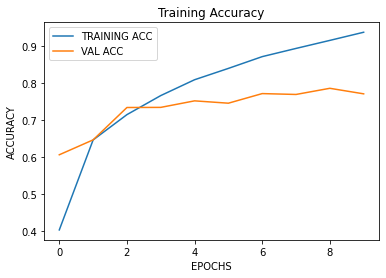

In [0]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy)
plt.title('Training Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs,val_acc)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

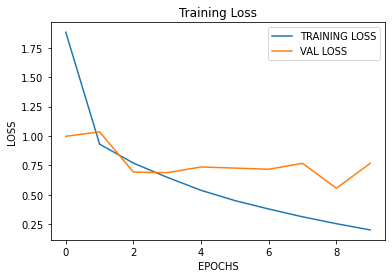

In [0]:
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS']) 
plt.title('Training Loss')
plt.show()

In [0]:
print(classification_report(test_generator.labels, pred))

              precision    recall  f1-score   support

           0       0.16      0.14      0.15       437
           1       0.15      0.17      0.16       474
           2       0.19      0.20      0.20       553
           3       0.16      0.20      0.18       525
           4       0.16      0.13      0.15       510
           5       0.16      0.15      0.16       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.16      3000
weighted avg       0.17      0.17      0.17      3000



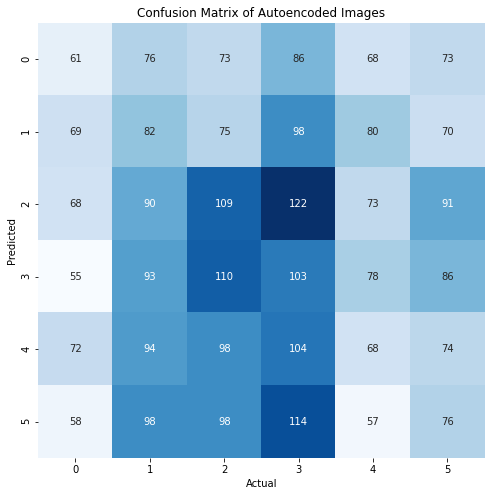

In [0]:
cm = confusion_matrix(test_generator.labels, pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.3g', cbar=False)
plt.title('Confusion Matrix of Autoencoded Images')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.show()

In [0]:
recall_score(test_generator.labels, pred, average='micro')

0.16633333333333333